<a href="https://colab.research.google.com/github/guocuimi/minitf/blob/master/notebooks/activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions with Derivative

In [6]:
!pip install minitf
%matplotlib inline
import matplotlib.pyplot as plt
import minitf as tf

In [0]:
def plot(x, y, grad, label):
  plt.plot(x.numpy(), y.numpy(), "g-", label=label)
  plt.plot(x.numpy(), grad.numpy(), "r--", label="derivative")
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()

Reference: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Linear
$
R(x) = x
$

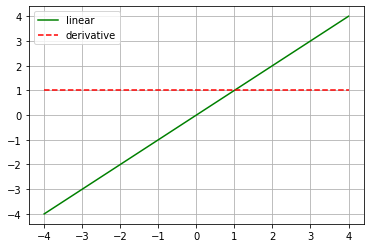

In [8]:
def linear(x):
  return x

x = tf.linspace(-4.0, 4.0, 200)
with tf.GradientTape() as tp:
  y = linear(x)
grad = tp.gradient(y, x)
plot(x, y, grad, "linear")

## ELU
$
\begin{split}R(x) = \begin{Bmatrix} x & x > 0 \\
 α( e^x – 1) & x <= 0 \end{Bmatrix}\end{split}
$

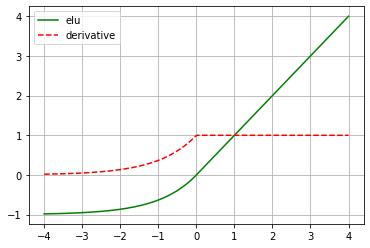

In [9]:
def elu(x, alpha=1.0):
  # return x * (x > 0) + alpha * (tf.exp(x) - 1.) * (x < 0)
  return tf.where(x > 0, x, alpha * (tf.exp(x) - 1.))

x = tf.linspace(-4.0, 4.0, 200)
with tf.GradientTape() as tp:
  y = elu(x)
grad = tp.gradient(y, x)
plot(x, y, grad, "elu")

## ReLU
$
\begin{split}R(x) = \begin{Bmatrix} x & x > 0 \\
 0 & x <= 0 \end{Bmatrix}\end{split}
 $

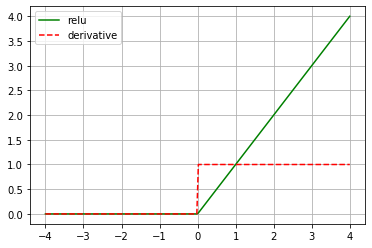

In [10]:
def relu(x):
  return tf.maximum(0, x)

x = tf.linspace(-4.0, 4.0, 200)
with tf.GradientTape() as tp:
  y = relu(x)
grad = tp.gradient(y, x)
plot(x, y, grad, "relu")

## LeakyRelu
$
\begin{split}R(x) = \begin{Bmatrix} x & x > 0 \\
 \alpha x & x <= 0 \end{Bmatrix}\end{split}
$

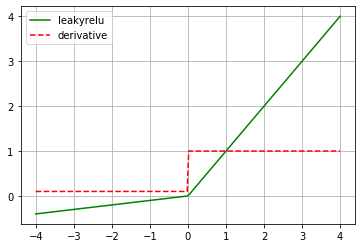

In [11]:
def leakyrelu(x, alpha=0.1):
  return tf.maximum(alpha * x, x)

x = tf.linspace(-4.0, 4.0, 200)
with tf.GradientTape() as tp:
  y = leakyrelu(x)
grad = tp.gradient(y, x)
plot(x, y, grad, "leakyrelu")

## Sigmoid
$
S(x) = \frac{1} {1 + e^{-x}}
$

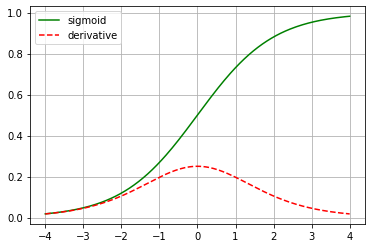

In [12]:
def sigmoid(x):
  return 1.0 / (1 + tf.exp(-x))

x = tf.linspace(-4.0, 4.0, 200)
with tf.GradientTape() as tp:
  y = sigmoid(x)
grad = tp.gradient(y, x)
plot(x, y, grad, "sigmoid")

## Tanh
$
tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$

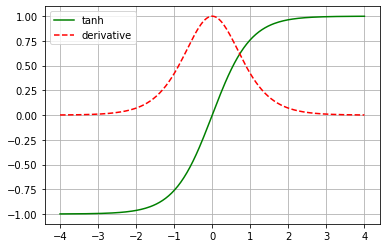

In [13]:
def tanh(x):
  return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

x = tf.linspace(-4.0, 4.0, 200)
with tf.GradientTape() as tp:
  y = tanh(x)
grad = tp.gradient(y, x)
plot(x, y, grad, "tanh")